# __Analysis of the growth and distribution of registered companies in Nepal__ (Furbished)

#### _-Piyush R._

Nepal has been enabling the development of new firms for around 86 years, beginning with the first registered company, "Biratnagar Jute Mill," in 1993 BS and continuing to new developing startups. As companies play an considerable part in the economic prosperity, their growth is always beneficial to the nation's economy.

The advancement of technology has undoubtedly aided the expansion of various businesses in recent years more than ever before. Startups are expanding across the country, from enterprises producing food and natural goods to computer startups developing software and IT solutions.

Bearing this in mind, I have gathered a collection of data comprising lists of various sorts of registered corporations/companies in various districts of Nepal from 2002 BS to 2072 BS.

So, let's conduct a comprehensive data analysis and evaluate the outcomes.

### __First, importing necessary python libraries:__

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In this data analysis project, we will use pandas for data analysis, cleaning, and exploration, and matplotlib and seaborn for data visualization.

### __Next, importing necessary csv files.__

We have a total of 11 csv files, each consisting needed fiscal year's data.

Source: https://opendatanepal.com/

In [2]:
df1 = pd.read_csv('./csv_files/FY_2002-2062.csv')
dfs = []
for i in range(63, 73):
    filename = f'./csv_files/FY_20{i}.csv'
    dfs.append(pd.read_csv(filename))

df2 = pd.concat(dfs)
df = pd.concat([df1, df2])

Now that the files have been concatenated into a single data frame, let's observe the structure of data.

In [3]:
df.head()

,_id,ENGLISH_NAME,DISTRICT,COMPANY_TYPE,REGISTRATION_DATE
0,1,RAGHUPATI JUTE MILLS,Sankhuwasabha,Private,2003
1,2,MORANG SUGAR MILLS,Morang,Public,2003
2,3,NEW EVEREST CONSULTENCY,Lalitpur,Private,2004
3,4,HIRA LAXMI TRADERS,Kanchanpur,Private,2007
4,5,HIMALAYAN WOOLEN MILLS,Lalitpur,Private,2007


As we can see, the data is organized into five distinct columns.

### __Visualizing Data__

##### Bar Plots:

First, determine the number of registered firms per company type. Then we'll create a bar graph that shows the number of registered firms by company type.

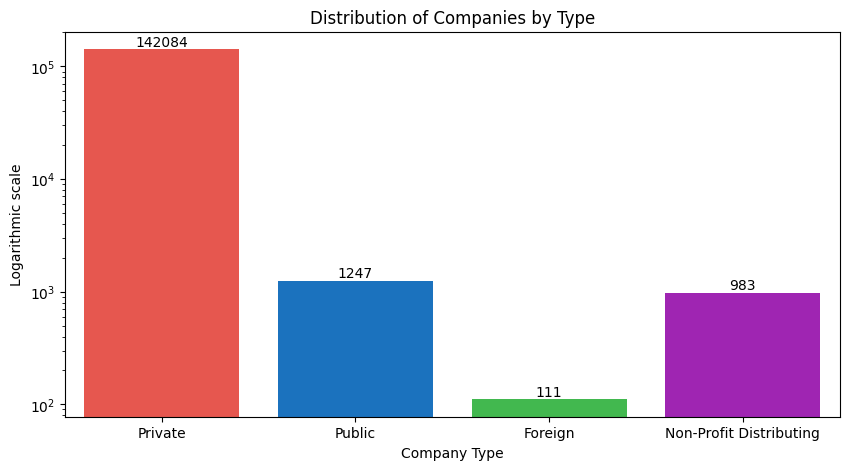

In [4]:
dfs = [df]
df_bar = df.copy()
for df_bar in dfs:
    df_bar.loc[df_bar['COMPANY_TYPE'].str.startswith('Pri'), 'COMPANY_TYPE'] = 'Private'
company_counts = df_bar['COMPANY_TYPE'].value_counts(normalize=True)
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='COMPANY_TYPE', data=df_bar, palette=['#FF4136', '#0074D9', '#2ECC40', '#B10DC9', '#FF851B', '#FFDC00', '#7FDBFF'])
plt.title('Distribution of Companies by Type')
plt.xlabel('Company Type')
plt.ylabel('Logarithmic scale')
for p in ax.containers:
    ax.bar_label(p, label_type='edge', fontsize=10, padding=0)
plt.yscale('log')
plt.show()

The plot shows that the number of registered private enterprises is exponentially more than the other groups.

Let us make another bar plot to depict the distribution of enterprises by district. For this, we shall split the districts into provinces and regions for this purpose.

We will require a csv file with the names of districts, as well as their corresponding regions and provinces.

In [7]:
df_district = pd.read_csv('./csv_files/disct.csv')

We will now merge the df_district and df data frames. The integrated data frame will then be saved as a CSV file.

In [8]:
df_merged = pd.merge(df, df_district, on='DISTRICT')
df_merged = df_merged.drop('id', axis=1)
df_merged = df_merged.drop('_id', axis=1)
df_merged.insert(0, 'id', range(1, len(df_merged) + 1))
df_merged.to_csv('./csv_files/merged.csv', index=False)

Let us look at the structure of the new data frame now.

In [9]:
df_merged.head()

,id,ENGLISH_NAME,DISTRICT,COMPANY_TYPE,REGISTRATION_DATE,province,region
0,1,RAGHUPATI JUTE MILLS,Sankhuwasabha,Private,2003,Province 1,Himalayan
1,2,LAXMI TREKKING COMPANY,Sankhuwasabha,Private,2007,Province 1,Himalayan
2,3,HULAS RICE MILLS,Sankhuwasabha,Private,2007,Province 1,Himalayan
3,4,GOLCHHA RICE OIL AND FLOUR MILLS,Sankhuwasabha,Private,2009,Province 1,Himalayan
4,5,LALITA RICE OIL DAAL&FLOUR MILL,Sankhuwasabha,Private,2009,Province 1,Himalayan


The data has now been arranged into seven columns, as we can see.

Visualization below shall show the distribution of various sorts of firms by province.

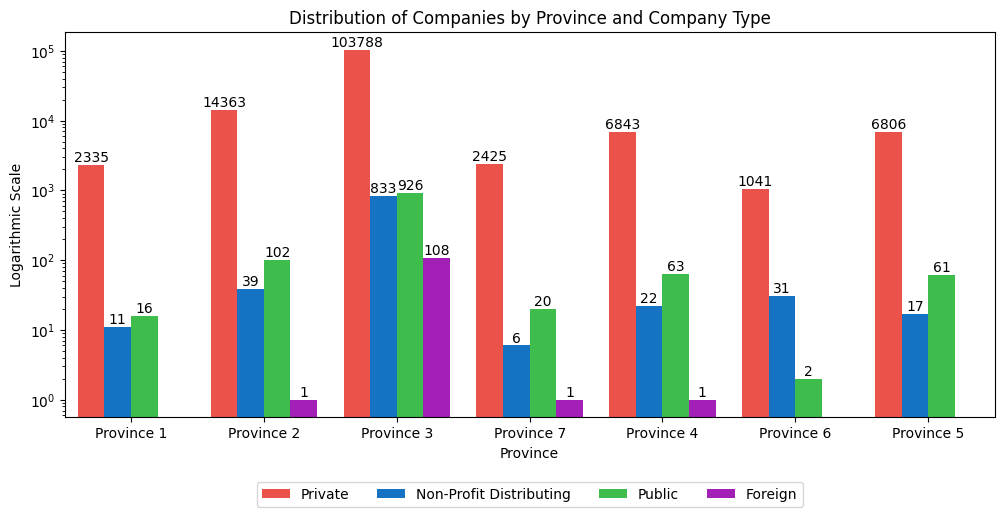

In [10]:
dfs = [df_merged]
for df_merged in dfs:
    df_merged.loc[df_merged['COMPANY_TYPE'].str.startswith('Pri'), 'COMPANY_TYPE'] = 'Private'

plt.figure(figsize=(12,5))
ax = sns.countplot(data=df_merged, x='province', hue='COMPANY_TYPE', palette=['#FF4136', '#0074D9', '#2ECC40', '#B10DC9', '#FF851B', '#FFDC00', '#7FDBFF'], saturation=0.8)
plt.title('Distribution of Companies by Province and Company Type')
plt.xlabel('Province')
plt.ylabel('Logarithmic Scale')
plt.yscale('log')
for p in ax.containers:
    ax.bar_label(p, label_type='edge', fontsize=10, padding=0)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.show()


According to the chart, Province 3 (Bagmati Province) has the most registered firms of all categories, while Province 6 (Karnal Province) has the fewest registered companies of all types.

This leads to the conclusion that Bagmati Province is the most developed, whereas Karnali Province is the least developed.

Similarly, no foreign enterprises are registered in Province 1, Karnali Province, or Lumbini Province.

Once again, a graphic representation below shall show the prevalence of various sorts of companies by area.

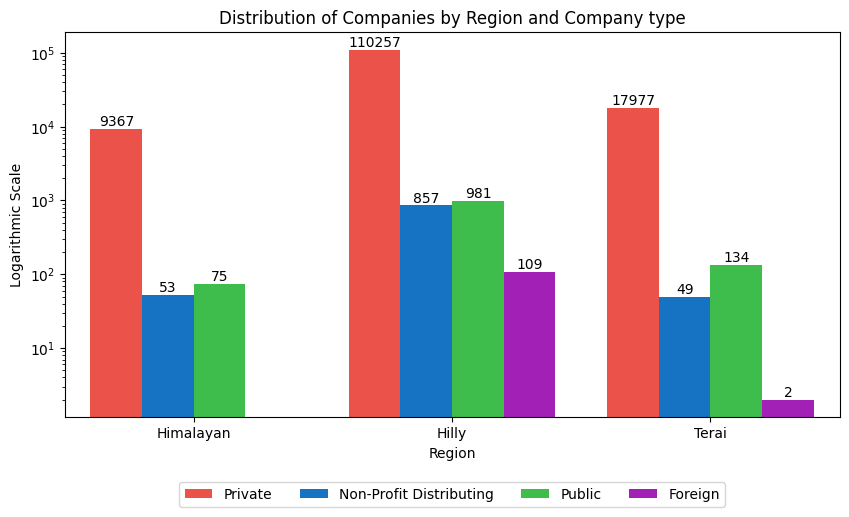

In [11]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df_merged, x='region', hue='COMPANY_TYPE', palette=['#FF4136', '#0074D9', '#2ECC40', '#B10DC9', '#FF851B', '#FFDC00', '#7FDBFF'], saturation=0.8)
plt.title('Distribution of Companies by Region and Company type')
plt.xlabel('Region')
plt.ylabel('Logarithmic Scale')
plt.yscale('log')
for p in ax.containers:
    ax.bar_label(p, label_type='edge', fontsize=10, padding=0)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.show()

The figure shows that the hilly part of Nepal has the most number of registered firms, while the Himalayan region has the fewest.

This supports the notion that the hilly region is the most developed, whereas the Himalayan region is the least developed.

Similarly, there are no registered foreign enterprises in the Himalayan area.

Now, consider the distribution of registered firms by district in relation to their region.

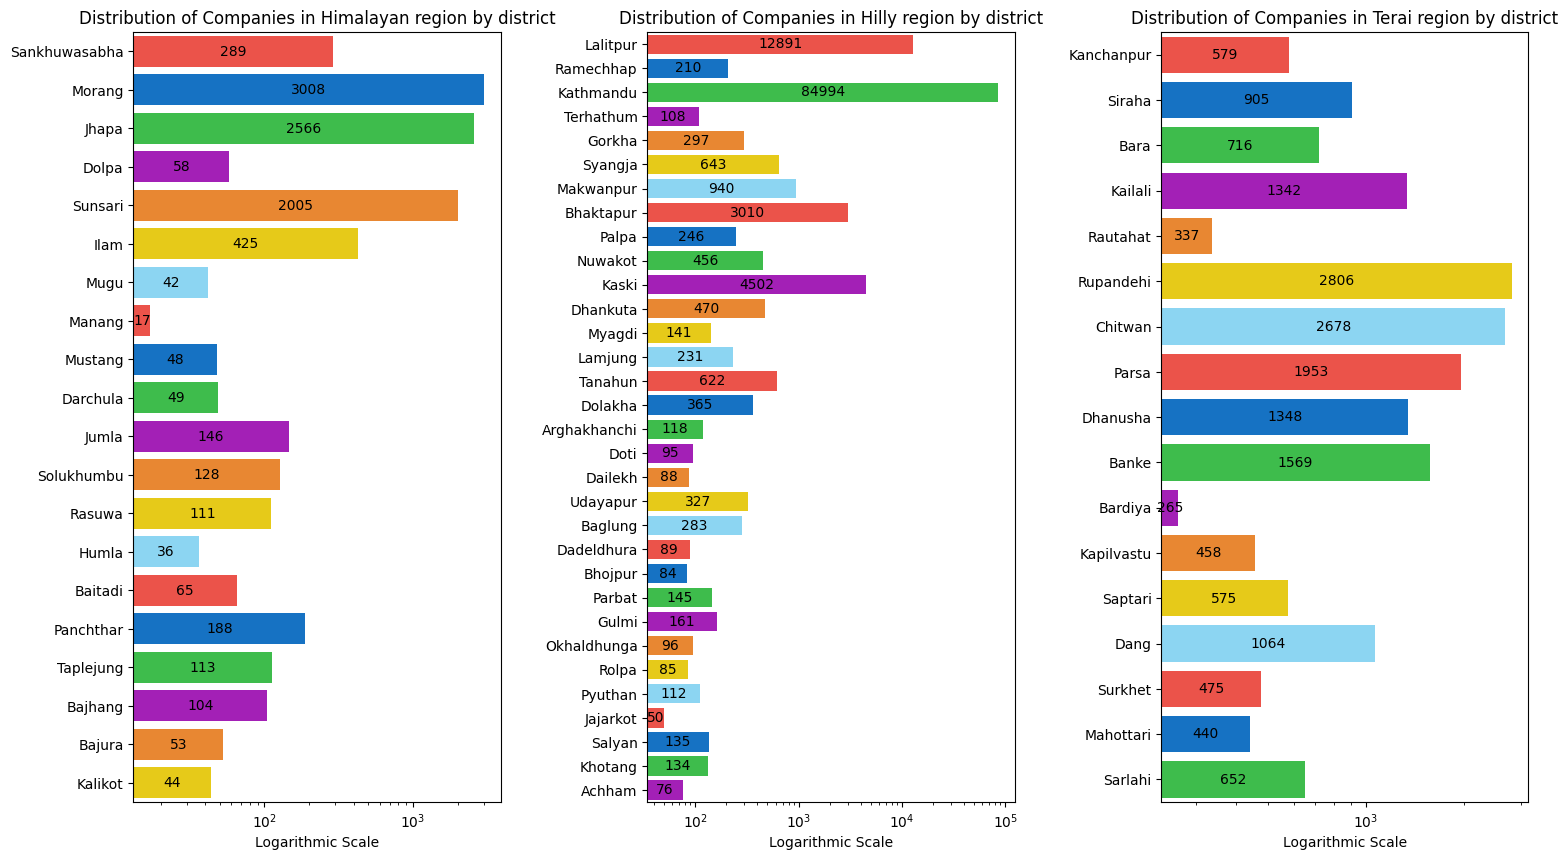

In [12]:
regions = df_merged['region'].unique()
fig, axs = plt.subplots(1, len(regions), figsize=(6*len(regions), 10))

for i, region in enumerate(regions):
    region_df = df_merged[df_merged['region']==region]
    ax = axs[i]
    sns.countplot(data=region_df, y='DISTRICT', ax=ax,
                  palette = ['#FF4136', '#0074D9', '#2ECC40', '#B10DC9', '#FF851B', '#FFDC00', '#7FDBFF'], saturation=0.8)
    ax.set_title(f'Distribution of Companies in {region} region by district')
    ax.set_xlabel('Logarithmic Scale')
    ax.set_ylabel('')
    ax.set_xscale('log')
    for p in ax.containers:
        ax.bar_label(p, label_type='center', fontsize=10, padding=0, color='black')
    plt.subplots_adjust(wspace=0.4)

plt.show()


According to the plots above, the hilly region has more districts, which benefits the overall number of registered enterprises in that region. Continuing with the investigation, the district with the fewest registered firms is Manang, making it Nepal's least developed district.

Again, let's visualize the distribution of registered companies by districts with respect to their province.

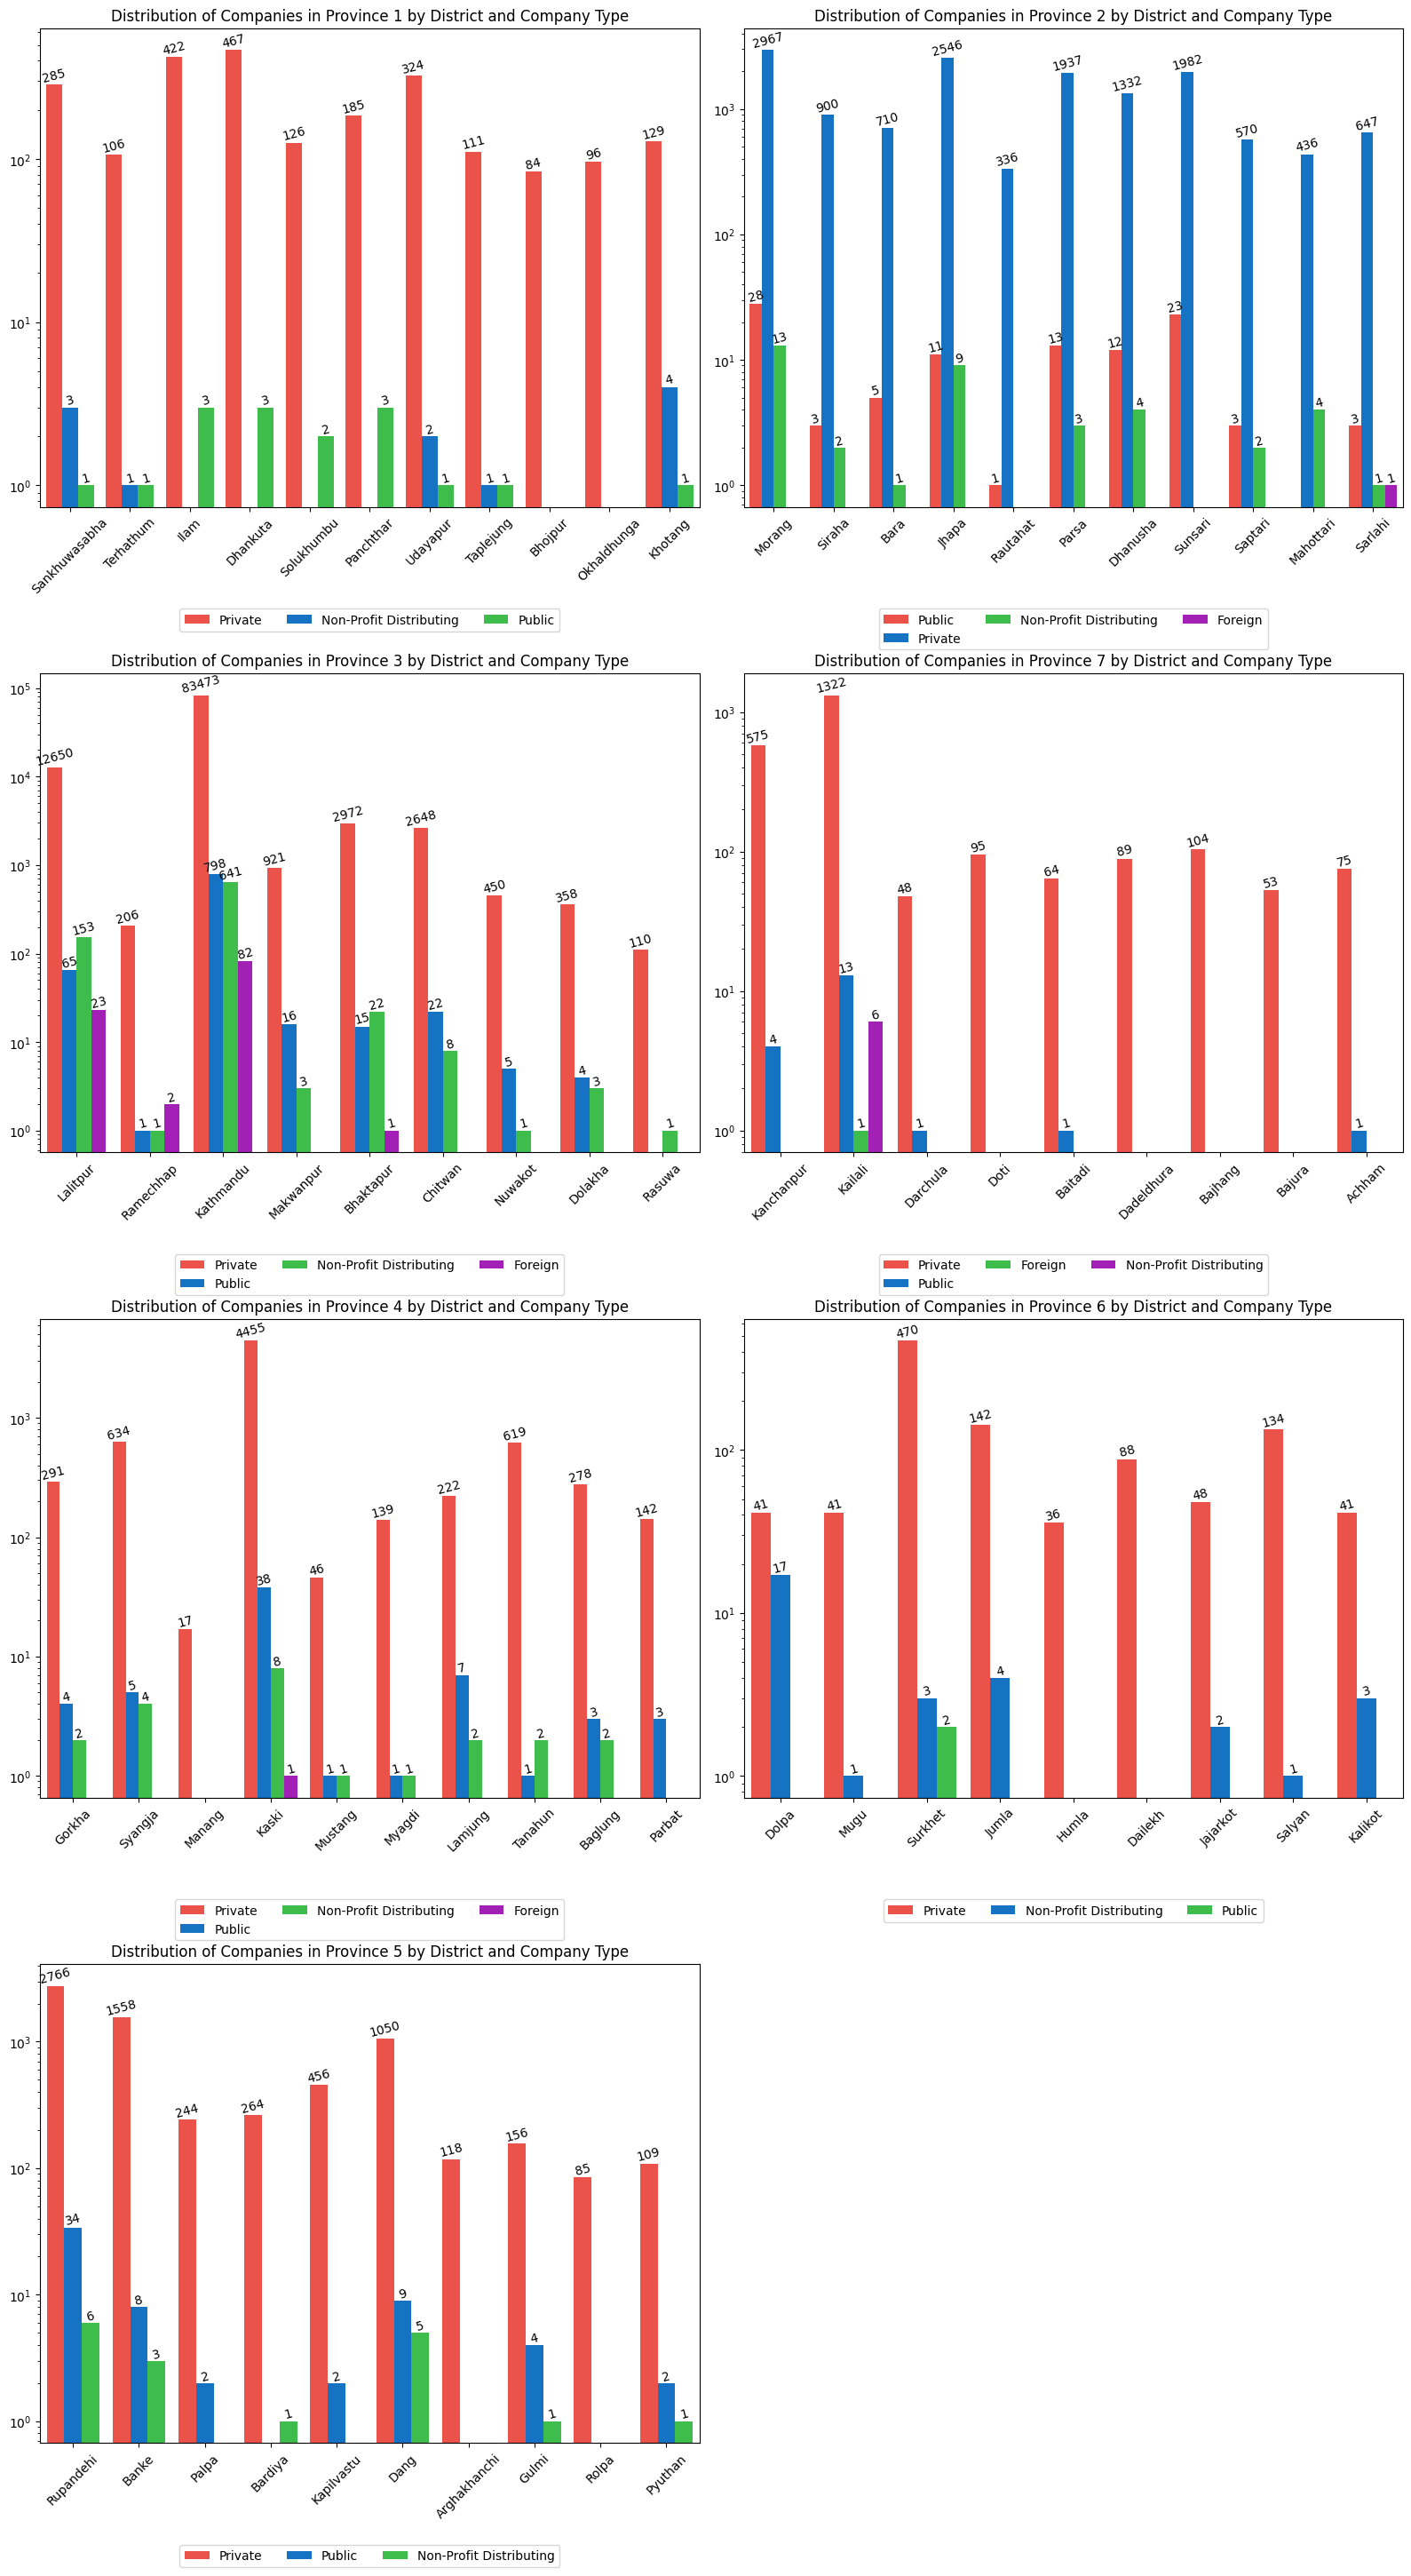

In [13]:
provinces = df_merged['province'].unique()
fig, axs = plt.subplots(len(provinces)//2 + len(provinces)%2, 2, figsize=(16, 8*len(provinces)//2 + 5*len(provinces)%2))

for i, province in enumerate(provinces):
    row = i // 2
    col = i % 2
    province_df = df_merged[df_merged['province']==province]
    ax = axs[row, col]
    sns.countplot(data=province_df, x='DISTRICT', hue='COMPANY_TYPE', ax=ax,
                  palette=['#FF4136', '#0074D9', '#2ECC40', '#B10DC9', '#FF851B', '#FFDC00'], saturation=0.8)
    ax.set_title(f'Distribution of Companies in {province} by District and Company Type')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_yscale('log')
    for p in ax.containers:
        ax.bar_label(p, label_type='edge', fontsize=10, padding=0, rotation=15)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

if len(provinces) % 2 != 0:
    fig.delaxes(axs[-1,-1])

plt.tight_layout()
plt.show()

The above array of multivariate bar plots depicts the distribution of various types of registered firms in each district and province of Nepal.

Based on the plots, it is obvious that Kathmandu has the most registered firms. Because of the constantly growing number of registered firms in Kathmandu, Province 3 (Bagmati Province) is the province with the most registered companies and hence the most developed province in Nepal.

Now, let us make a distribution table that lists the top ten and bottom ten districts with the most and least firms, as well as their categories, regions, and provinces.

In [14]:
table = pd.crosstab(index=[df_merged['DISTRICT'], df_merged['province'], df_merged['region']], columns=df_merged['COMPANY_TYPE'], margins=True)
table = table.sort_values(by=['All'], ascending=False)
table = table.iloc[:-1, :-1]
table1 = table.loc[table.sum(axis=1).sort_values(ascending=False)[:10].index]

table1

,,COMPANY_TYPE,Foreign,Non-Profit Distributing,Private,Public
DISTRICT,province,region,,,,
All,,,111,959,137601,1190
Kathmandu,Province 3,Hilly,82,641,83473,798
Lalitpur,Province 3,Hilly,23,153,12650,65
Kaski,Province 4,Hilly,1,8,4455,38
Bhaktapur,Province 3,Hilly,1,22,2972,15
Morang,Province 2,Himalayan,0,13,2967,28
Rupandehi,Province 5,Terai,0,6,2766,34
Chitwan,Province 3,Terai,0,8,2648,22
Jhapa,Province 2,Himalayan,0,9,2546,11


In [15]:
table = pd.crosstab(index=[df_merged['DISTRICT'], df_merged['province'], df_merged['region']], columns=df_merged['COMPANY_TYPE'], margins=True)
table = table.sort_values(by=['All'], ascending=True)
table = table.iloc[:-1, :-1]
table2 = table.loc[table.sum(axis=1).sort_values(ascending=True)[:10].index]

table2

,,COMPANY_TYPE,Foreign,Non-Profit Distributing,Private,Public
DISTRICT,province,region,,,,
Manang,Province 4,Himalayan,0,0,17,0
Humla,Province 6,Himalayan,0,0,36,0
Mugu,Province 6,Himalayan,0,1,41,0
Kalikot,Province 6,Himalayan,0,3,41,0
Mustang,Province 4,Himalayan,0,1,46,1
Darchula,Province 7,Himalayan,0,0,48,1
Jajarkot,Province 6,Hilly,0,2,48,0
Bajura,Province 7,Himalayan,0,0,53,0
Dolpa,Province 6,Himalayan,0,17,41,0


We can see from the distribution tables above that: 
1. The bulk of the districts with the most firms are in mountainous areas and province 3 (Bagmati Province).
2. The Himalayan area and province 6 (Karnali Province) have the bulk of the districts with the fewest firms.

This leads us to the conclusion that the hilly area and Bagmati province are Nepal's most developed regions and provinces, respectively. Similarly, the Himalayan area and Karnali province are Nepal's least developed regions and provinces, respectively.

Furthermore, because Kathmandu and Manang have the most and least registered enterprises, respectively, we infer that: 
1. Kathmandu is Nepal's most developed district.
2. Manang is the most underdeveloped.

In [16]:
df_merged['REGISTRATION_DATE'] = pd.to_datetime(df_merged['REGISTRATION_DATE'], format='%Y')
first_companies = df_merged.groupby('COMPANY_TYPE').first()
first_companies = first_companies[['ENGLISH_NAME', 'DISTRICT', 'province', 'region', 'REGISTRATION_DATE']]
first_companies = first_companies.rename(columns={'REGISTRATION_DATE': 'FIRST_REGISTRATION_YEAR'})
first_companies['FIRST_REGISTRATION_YEAR'] = first_companies['FIRST_REGISTRATION_YEAR'].dt.year
first_companies = first_companies.sort_values('FIRST_REGISTRATION_YEAR')

first_companies

,ENGLISH_NAME,DISTRICT,province,region,FIRST_REGISTRATION_YEAR
COMPANY_TYPE,,,,,
Private,RAGHUPATI JUTE MILLS,Sankhuwasabha,Province 1,Himalayan,2003
Foreign,American Life Insurance Company,Lalitpur,Province 3,Hilly,2063
Non-Profit Distributing,Modern Makalu community Academy,Sankhuwasabha,Province 1,Himalayan,2064
Public,Khadabari Development Bank,Sankhuwasabha,Province 1,Himalayan,2066


The distribution table above indicates when the first of each form of company was registered after 2002 BS. The chart gives a unique glimpse into how, in the early years, Sankhuwasabha, a district in Nepal's Himalayan region, was a popular location for business registration.

##### Line Plot:

Let's make a line graph that will illustrate the rise in the number of registered businesses from 2002 BS to 2072 BS

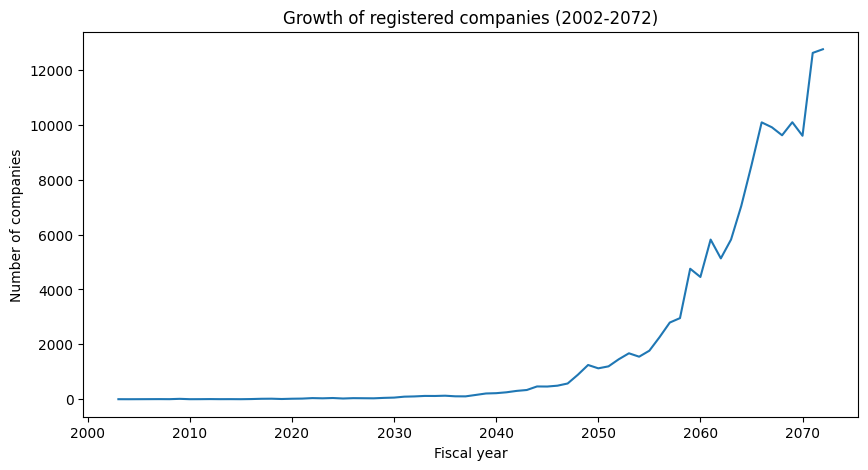

In [18]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='REGISTRATION_DATE', y='id', data=df_merged.groupby(['REGISTRATION_DATE'])['id'].count().reset_index())
plt.title("Growth of registered companies (2002-2072)")
plt.xlabel("Fiscal year")
plt.ylabel("Number of companies")
plt.show()

The number of registered firms has expanded rapidly during a 70-year period (2002-2072 BS), with intermittent dips between 2060 and 2070.

Let us now illustrate the growth of various sorts of enterprises throughout time.

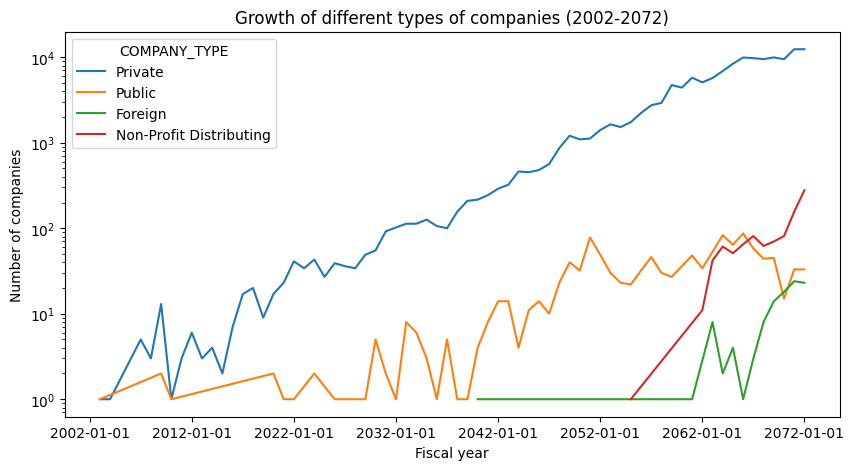

In [19]:
df_merged['REGISTRATION_DATE'] = pd.to_datetime(df_merged['REGISTRATION_DATE'], format='%Y')
df_grouped = df_merged.groupby(['REGISTRATION_DATE', 'COMPANY_TYPE']).size().reset_index(name='count')
plt.figure(figsize=(10, 5))
sns.lineplot(x='REGISTRATION_DATE', y='count', hue='COMPANY_TYPE', data=df_grouped)
plt.title("Growth of different types of companies (2002-2072)")
plt.xlabel("Fiscal year")
plt.xticks(pd.date_range(start='2002', end='2082', freq='10Y').strftime('%Y'))
plt.ylabel("Number of companies")
plt.yscale('log')
plt.show()


From 2002 to 2072 BS, the line plot above depicts the growth tendency of four main types of enterprises in Nepal. While private enterprises have had exponential growth since 2003 BS, other sorts of firms have only witnessed development in recent years.

### __Extracting Conclusions__

We used bar and line graphs to show the data and created a few distributive tables.

Each of these visualizations highlighted the following trends and conclusions:

1. The great majority of registered corporations are owned by individuals.

2. Kathmandu has the most registered businesses.

3. In terms of the number of registered enterprises, Bagmati province is the most developed, while Karnali province is the least developed.

4. In terms of the number of firms, the hilly region is the most developed, while the Himalayan region is the least developed.

5. Manang is the least developed district, with only 17 registered businesses, while Kathmandu is the most developed, with 84994 registered businesses as of 2072 BS.

6. During its early years, Sankhuwasabha was a prominent location for company formation in a Himalayan area. 

7. The number of enterprises has increased dramatically from 2002 to 2072 BS and is expected to continue to grow in the coming years. 

Finally, computing the relationship between the rise in the number of businesses and the years they were registered.

In [20]:
df_merged['year'] = pd.DatetimeIndex(df_merged['REGISTRATION_DATE']).year
total_companies_by_year = df_merged.groupby(['year'])['id'].count().reset_index()
corr_coef = total_companies_by_year['year'].corr(total_companies_by_year['id'])

print("Correlation coefficient: ", round(corr_coef, ndigits=3))

Correlation coefficient:  0.773


We got a correlation coefficient of 0.773.

Since, the coefficient calculated is more than 0.7, there is a strong positive correlation between the number of firms and their respective registration years. This indicates that the number of companies will continue to grow as the year progresses. 